In [1]:
import sys
sys.path.append('../')
import numpy as np
from clfanalysis.predict import run_classifier_predictions

# Data

In [3]:
DataParams = {}

fileID_Igor_list_8 = ['210051', '211842']  #['215255', '222553','225544','232908', '235431']     
fileID_Igor_list_25= ['210123', '211909'] #['215322', '222709','225609','232935', '235456']
fileID_Igor_list_50= ['210159', '211939'] # ['215351','222738','225640','233005', '235527']

clf_flag = 'rf' 
datafile_p = fileID_Igor_list_8

DataParams['N'] = 5
DataParams['prefix']  = '../expt_data/Cornelius_data_2/'
DataParams['year']  = '2018'
DataParams['date']  = '20181008'
DataParams['brightID']  = '210043'#'214921'
DataParams['darkID']  = '210005'#'214856'
DataParams['img_shape']  = (11, 33)
DataParams['cycles']  = 500 #100 
DataParams['save'] = '_pApB_8'

binary_data = []
rho_0_data = []
rho_1_data =[]
pi_data = []

# Classification Analysis

In [4]:
for ionpos in range(DataParams['N']):
    print()
    print('Ion number', ionpos + 1)
    
    pred, wpred, rho0, rho1, pi = run_classifier_predictions(ionpos, clf_flag, datafile_p, **DataParams)
    
    binary_data.append(pred)
    rho_0_data += rho0
    rho_1_data += rho1
    pi_data +=pi 
    
    np.savez(clf_flag+'_fulldata_'+DataParams['save'], 
             DataParams=DataParams, 
             binary_data=binary_data, 
             rho_0_data=rho_0_data,
             rho_1_data=rho_1_data,
             pi_data=pi_data)
    

    


Ion number 1
Request that following prediction datasets are concatenated:
['210051', '211842']
Adding file with IGOR ID:  210051
Adding file with IGOR ID:  211842
Making a prediction 0 estf 0.9 0.0
Making a prediction 0 bare 0.89 0.0
Making a prediction 1 estf 0.96 0.9
Making a prediction 1 bare 0.97 0.89
Making a prediction 7 estf 0.97 0.96
Making a prediction 9 estf 1.0 0.97
Making a prediction 9 bare 1.0 0.97

Ion number 2
Request that following prediction datasets are concatenated:
['210051', '211842']
Adding file with IGOR ID:  210051
Adding file with IGOR ID:  211842
Making a prediction 0 estf 0.96 0.0
Making a prediction 0 bare 0.97 0.0
Making a prediction 9 estf 0.97 0.96

Ion number 3
Request that following prediction datasets are concatenated:
['210051', '211842']
Adding file with IGOR ID:  210051
Adding file with IGOR ID:  211842
Making a prediction 0 estf 0.96 0.0
Making a prediction 0 bare 0.95 0.0

Ion number 4
Request that following prediction datasets are concatenated:

0.0110789361314087 4.448049987230585e-05 0.4942094623958689


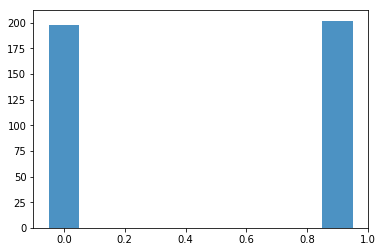

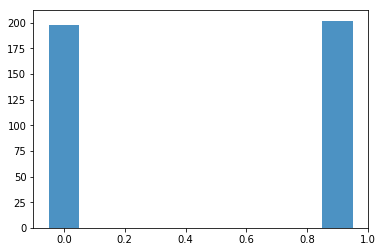

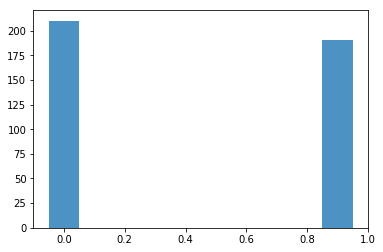

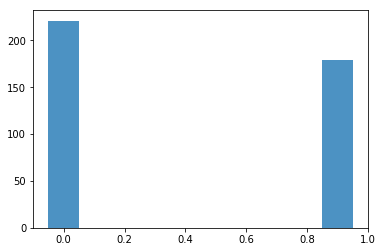

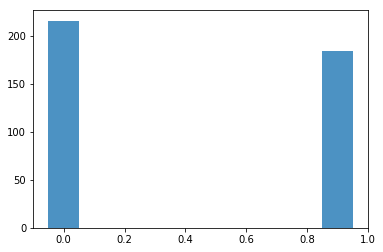

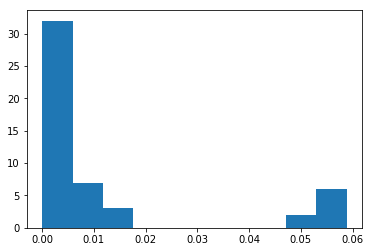

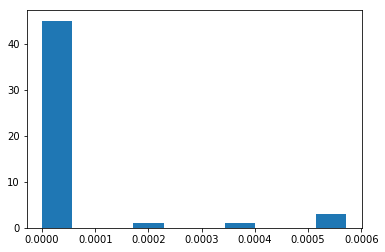

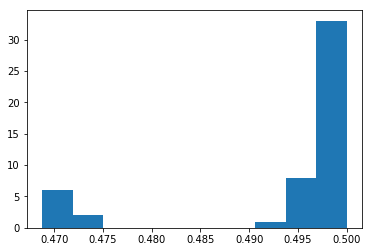

In [6]:
print(np.mean(np.asarray(rho_0_data)), np.mean(np.asarray(rho_1_data)),np.mean(np.asarray(pi_data)))


import matplotlib.pyplot as plt

for idx in range(5):
    plt.figure()
    plt.hist(binary_data[idx] - 0.05, alpha=0.8)
    plt.show()

plt.figure()
plt.hist(np.asarray(rho_0_data))
plt.show()

plt.figure()
plt.hist(np.asarray(rho_1_data))
plt.show()

plt.figure()
plt.hist(np.asarray(pi_data))
plt.show()